In [105]:
%run ../odr_v3.1.ipynb
import matplotlib
matplotlib.rc('font', size=14) 
%run ../arr2table_v4.0.ipynb

In [106]:
rel,u_d,i_d=txt2arr("1.1")

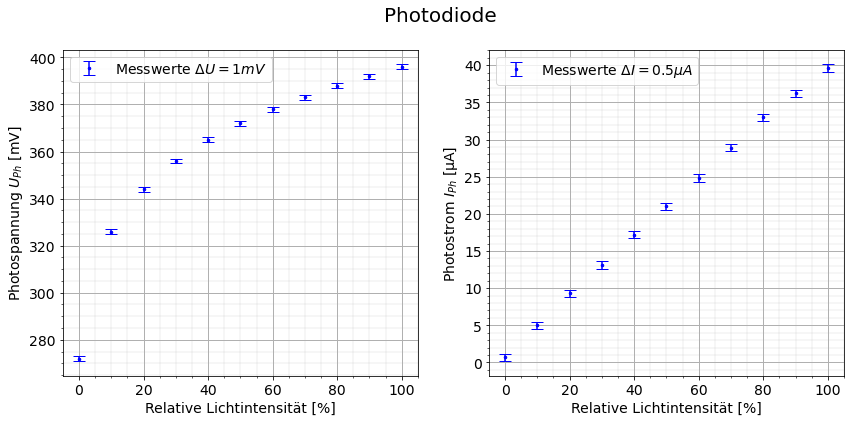

In [107]:
plt.figure(1)
plt.subplot(121)
plt.errorbar(x=rel,y=u_d,yerr=1,label="Messwerte $\Delta U=1mV$",fmt='.',c='b',capsize=6,ms=5)
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photospannung $U_{Ph}$ [mV]")
#plt.scale("log")
draw("")
plt.subplot(122)
plt.errorbar(x=rel,y=i_d,yerr=0.5,label="Messwerte $\Delta I=0.5µA$",fmt='.',c='b',capsize=6,ms=5)

#plt.errorbar(x=rel,y=i_d,label="Messwerte",fmt='x',ms=16,c='r')
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photostrom $I_{Ph}$ [µA]")

plt.suptitle('Photodiode',fontsize=20)
draw("",size=(14,6))
save("diode")

In [108]:
align='c'
head=["Lichtintensität [\%]","$U_{Ph}$ [mV]","$I_{Ph}$ [µA]"]
val=[rel,u_d,i_d]
err=[0,1,0.5] 
cap="Photodiode"
lab="PhDio"
nk=[0,0,1]
print(table(align,head,val,err,cap,lab,nk,longtable=False,copy=False))

\begin{table}[H] 
\centering 
\caption{Photodiode} 
\begin{tabular}{c|c|c} 
Lichtintensität [\%]	 &$U_{Ph}$ [mV]	 &$I_{Ph}$ [µA]	 \\\hline
100	&396$\pm$1	&39.6$\pm$0.5	\\ 
90	&392$\pm$1	&36.2$\pm$0.5	\\ 
80	&388$\pm$1	&33.0$\pm$0.5	\\ 
70	&383$\pm$1	&28.9$\pm$0.5	\\ 
60	&378$\pm$1	&24.8$\pm$0.5	\\ 
50	&372$\pm$1	&21.0$\pm$0.5	\\ 
40	&365$\pm$1	&17.2$\pm$0.5	\\ 
30	&356$\pm$1	&13.1$\pm$0.5	\\ 
20	&344$\pm$1	&9.3$\pm$0.5	\\ 
10	&326$\pm$1	&5.0$\pm$0.5	\\ 
0	&272$\pm$1	&0.7$\pm$0.5	
\label{Tab:PhDio} 
\end{tabular} 
\end{table}


In [109]:
rel,i_t=txt2arr("1.2")

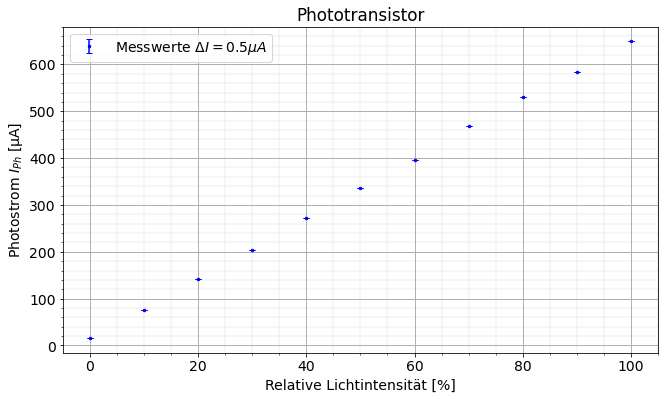

In [110]:
plt.errorbar(x=rel,y=i_t*1e3,yerr=0.5e-3,label="Messwerte $\Delta I=0.5µA$",fmt='.',c='b',capsize=3,ms=5)
plt.xlabel("Relative Lichtintensität [%]")
plt.ylabel("Photostrom $I_{Ph}$ [µA]")
#plt.scale("log")
draw("Phototransistor")
save("transistor")

In [111]:
align='c'
head=["Lichtintensität [\%]","$I_{Ph}$ [µA]"]
val=[rel,i_t]
err=[0,3] 
cap="Phototransistor"
lab="PhTran"
nk=0
print(table(align,head,val,err,cap,lab,nk,longtable=False,copy=False))

\begin{table}[H] 
\centering 
\caption{Phototransistor} 
\begin{tabular}{c|c} 
Lichtintensität [\%]	 &$I_{Ph}$ [µA]	 \\\hline
100	&1$\pm$3	\\ 
90	&1$\pm$3	\\ 
80	&1$\pm$3	\\ 
70	&0$\pm$3	\\ 
60	&0$\pm$3	\\ 
50	&0$\pm$3	\\ 
40	&0$\pm$3	\\ 
30	&0$\pm$3	\\ 
20	&0$\pm$3	\\ 
10	&0$\pm$3	\\ 
0	&0$\pm$3	
\label{Tab:PhTran} 
\end{tabular} 
\end{table}


In [112]:
farbe,u=txt2arr("1.3",strings=[0])
#np.flip()

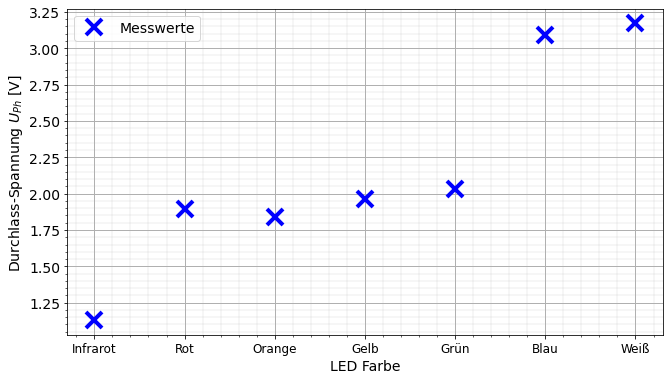

In [113]:
x=np.arange(0,len(u))
plt.errorbar(x=x,y=u,label="Messwerte",fmt='x',ms=16,mew=4,color="b")
plt.ylabel("Durchlass-Spannung $U_{Ph}$ [V]")
plt.xlabel("LED Farbe")
x_ticks_labels = ['Violett','Blau','Grün','Grün','Orange','Rot']
ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels(farbe, rotation='horizontal', fontsize=12)

draw()

No handles with labels found to put in legend.


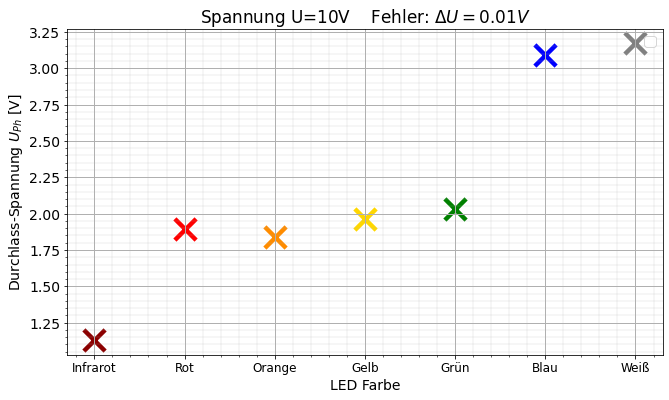

In [114]:
col=["darkred","red","darkorange","gold","green","blue","grey"]
x=np.arange(0,len(u))
for i in range(len(u)):
    plt.scatter(x[i], u[i],marker="x", c = col[i],s=10, linewidth = 30,label="") 
    
ax = plt.gca()
ax.set_xticks(x)
plt.ylabel("Durchlass-Spannung $U_{Ph}$ [V]")
plt.xlabel("LED Farbe")
ax.set_xticklabels(farbe, rotation='horizontal', fontsize=12)
draw("Spannung U=10V    Fehler: $\Delta U=0.01V$")
save("led")

In [115]:
B=3500
R25=10e3
T25=298.15
def NTC_func(T):
    T=T+273.15
    return R25*np.exp(-B*(1/T25-1/T))

R0=1000
alpha=3.85e-3
def PTC_func(T):
    return R0*(1+alpha*T)


NTC_T_mess=PTC_T_mess=[-40,20,30]
NTC_R_mess=np.array([339000.0,12780.0,12360.0])
PTC_R_mess=np.array([812,1076,1122])

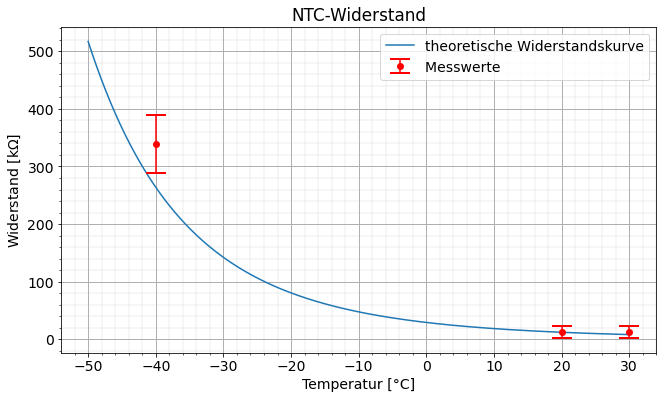

In [116]:
T=np.linspace(-50,30,10000)
NTC_R=NTC_func(T)
plt.plot(T,NTC_R*1e-3,label="theoretische Widerstandskurve")
# plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Temperatur [°C]")
plt.ylabel("Widerstand [k$\Omega$]")

#plt.scatter(NTC_T_mess,NTC_R_mess*1e-3,marker="x",s=5, linewidth = 20,color="red",label="Messwerte")
plt.errorbar(NTC_T_mess,NTC_R_mess*1e-3,yerr=[50,10,10],fmt='.',ms=10,mew=2,capsize=10,color="red",label="Messwerte ")

draw("NTC-Widerstand")
save("NTC")

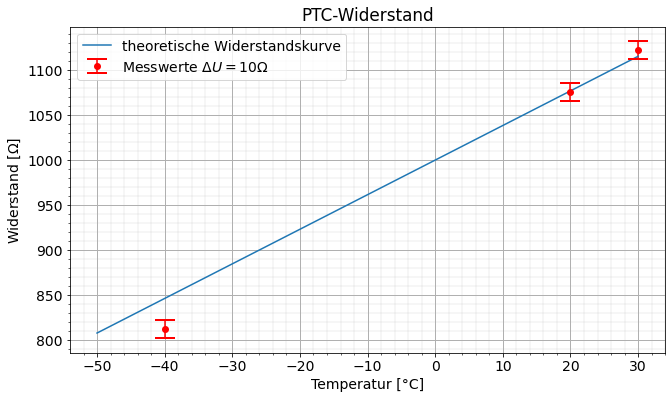

In [117]:
T=np.linspace(-50,30,10000)
PTC_R=PTC_func(T)

plt.plot(T,PTC_R,label="theoretische Widerstandskurve")
# plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Temperatur [°C]")
plt.ylabel("Widerstand [$\Omega$]")


plt.errorbar(PTC_T_mess,PTC_R_mess,yerr=10,fmt='.',ms=10,mew=2,capsize=10,color="red",label="Messwerte $\Delta U=10\Omega$")

#plt.scatter(PTC_T_mess,PTC_R_mess,marker="x",s=5, linewidth = 20,color="red",label="Messwerte")
draw("PTC-Widerstand")
save("PTC")

In [118]:
[NTC_func(i) for i in [-100,0,25,50,100,1000]]

[47916496.839017026,
 29282.79149950059,
 10000.0,
 4032.5989234143954,
 944.720302165836,
 1.246537566376317]